In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
diamond_train = pd.read_csv('./data/diamonds_train.csv.zip')
diamond_test = pd.read_csv('./data/diamonds_predict.csv')

In [4]:
diamond_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [11]:
diamond_train.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [29]:
diamond_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

In [30]:
diamond_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  volume   40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [13]:
len(diamond_train[(diamond_train['x']==0) | (diamond_train['y']==0) |(diamond_train['z']==0)])

16

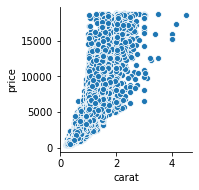

In [31]:
sns.pairplot(diamond_train, x_vars=['carat'], y_vars=['price'])

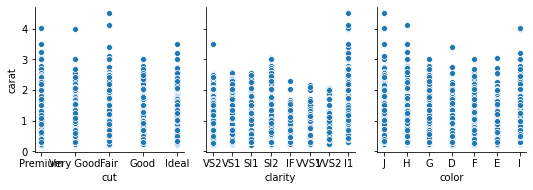

In [32]:
sns.pairplot(diamond_train, x_vars=['cut','clarity','color'], y_vars=['carat'])

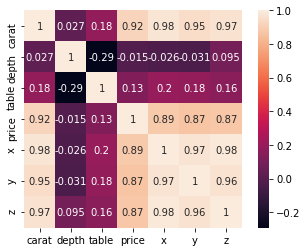

In [15]:
corr = diamond_train.corr()
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

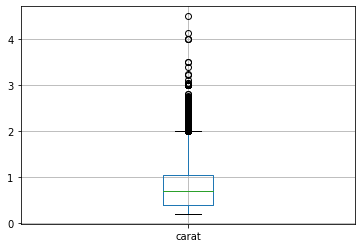

In [16]:
diamond_train['carat'].plot(kind='box', grid=True);

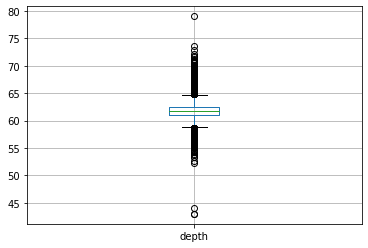

In [18]:
diamond_train['depth'].plot(kind='box', grid=True);

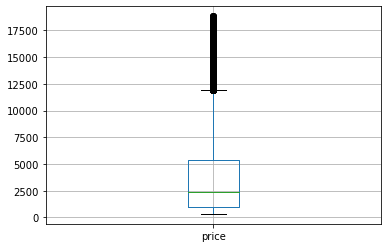

In [21]:
diamond_train['price'].plot(kind='box', grid=True);

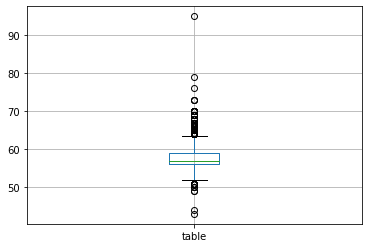

In [22]:
diamond_train['table'].plot(kind='box', grid=True);

## Volume

In [24]:
diamond_train['volume'] = diamond_train['x']*diamond_train['y']*diamond_train['z']
diamond_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975


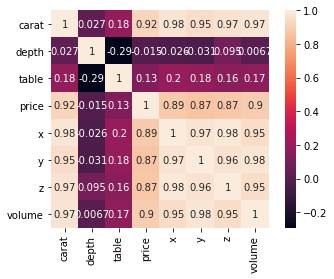

In [25]:
corr = diamond_train.corr()
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

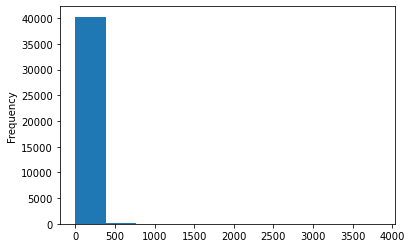

In [27]:
diamond_train['volume'].plot(kind='hist')

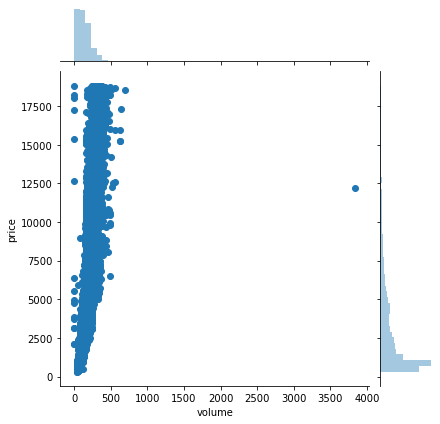

In [28]:
sns.jointplot(x='volume', y='price', data=diamond_train, height=6)

## Modeling

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [34]:
TARGET = 'price'

NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','volume']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS

In [35]:
categorical_transformer= \
Pipeline(steps=[('imputer', 
                 SimpleImputer(strategy='constant', 
                               fill_value='missing')),
               ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [36]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
               ('scaler', StandardScaler())])

In [37]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                               ('cat', categorical_transformer, CAT_FEATS)])

In [38]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z',
                                  'volume']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cut', 'color', 'clarity'])])

In [40]:
pd.DataFrame(data=preprocessor.fit_transform(diamond_train)).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657,0.852876,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259,-0.981034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891,-0.207411,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607,-0.805209,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274,0.489559,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Split

In [42]:
from sklearn.model_selection import train_test_split

diamonds_train, diamonds_test = train_test_split(diamond_train)

In [43]:
diamonds_train.shape

(30341, 11)

In [44]:
diamonds_test.shape

(10114, 11)

## Ensemble model

In [45]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


model= Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', GradientBoostingClassifier(random_state=0))])

In [ ]:
model.fit(diamonds_train[FEATS], diamonds_train[TARGET]);